<a href="https://colab.research.google.com/github/Suyogpawar03/Machine-learning-/blob/main/model6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Global_Pollution_Analysis.csv to Global_Pollution_Analysis (2).csv


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import scipy.cluster.hierarchy as sch

In [ ]:
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [ ]:
print(df.isnull().sum())

Country                                   0
Year                                      0
Air_Pollution_Index                       0
Water_Pollution_Index                     0
Soil_Pollution_Index                      0
Industrial_Waste (in tons)                0
Energy_Recovered (in GWh)                 0
CO2_Emissions (in MT)                     0
Renewable_Energy (%)                      0
Plastic_Waste_Produced (in tons)          0
Energy_Consumption_Per_Capita (in MWh)    0
Population (in millions)                  0
GDP_Per_Capita (in USD)                   0
dtype: int64


In [ ]:
nom_columns = ['Air_Pollution_Index' , 'Water_Pollution_Index','Soil_Pollution_Index']

scale = MinMaxScaler()

df[nom_columns] = scale.fit_transform(df[nom_columns])

df.head()



,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,0.898042,0.553778,0.295481,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,0.147062,0.173673,0.768178,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,0.166727,0.310542,0.800768,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,0.929982,0.214222,0.596973,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,0.520331,0.573161,0.799537,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [ ]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Country','Year']


le = LabelEncoder()
for col in columns_to_encode:
    df[col] = le.fit_transform(df[col])
    print(df.head())

   Country  Year  Air_Pollution_Index  Water_Pollution_Index  \
0       77  2005             0.898042               0.553778   
1      147  2001             0.147062               0.173673   
2      136  2016             0.166727               0.310542   
3       38  2018             0.929982               0.214222   
4       46  2008             0.520331               0.573161   

   Soil_Pollution_Index  Industrial_Waste (in tons)  \
0              0.295481                    94802.83   
1              0.768178                    56283.92   
2              0.800768                    56256.02   
3              0.596973                    74864.73   
4              0.799537                    76862.06   

   Energy_Recovered (in GWh)  CO2_Emissions (in MT)  Renewable_Energy (%)  \
0                     158.14                   5.30                 41.11   
1                     498.04                   6.34                 36.44   
2                     489.51                  49.69  

In [ ]:
df['Population_Actual'] = df['Population (in millions)'] * 1_000_000


df['Total_Energy_Consumption (MWh)'] = df['Energy_Recovered (in GWh)'] * 1000

df['Calculated_Energy_Per_Capita (MWh)'] = df['Total_Energy_Consumption (MWh)'] / df['Population_Actual']
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Population_Actual,Total_Energy_Consumption (MWh),Calculated_Energy_Per_Capita (MWh)
0,77,5,0.898042,0.553778,0.295481,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,42220000.0,158140.0,0.003746
1,147,1,0.147062,0.173673,0.768178,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,137250000.0,498040.0,0.003629
2,136,16,0.166727,0.310542,0.800768,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,124470000.0,489510.0,0.003933
3,38,18,0.929982,0.214222,0.596973,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,67800000.0,145180.0,0.002141
4,46,8,0.520331,0.573161,0.799537,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,186520000.0,40380.0,0.000216


In [ ]:
df['Average_Pollution_Index'] = (
    df['Air_Pollution_Index'] +
    df['Water_Pollution_Index'] +
    df['Soil_Pollution_Index']
) / 3

# Create categorical target: Low (0), Medium (1), High (2)
# Compute thresholds using quantiles
low_threshold = df['Average_Pollution_Index'].quantile(0.33)
high_threshold = df['Average_Pollution_Index'].quantile(0.66)

# Create Pollution_Level using those thresholds
def classify_pollution(value):
    if value <= low_threshold:
        return 0  # Low
    elif value <= high_threshold:
        return 1  # Medium
    else:
        return 2  # High

df['Pollution_Level'] = df['Average_Pollution_Index'].apply(classify_pollution)

# Check the class distribution
print(df['Pollution_Level'].value_counts())


def classify_pollution(value):
    if value <= low_threshold:
        return 'low' # Low
    elif value <= high_threshold:
        return   'medium'
    else:
        return 'high'

df['Pollution_Severity'] = df['Average_Pollution_Index'].apply(classify_pollution)

# Check the class distribution
print(df['Pollution_Severity'].value_counts())

df.head()

df.head()

Pollution_Level
2    68
0    66
1    66
Name: count, dtype: int64
Pollution_Severity
high      68
low       66
medium    66
Name: count, dtype: int64


,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Population_Actual,Total_Energy_Consumption (MWh),Calculated_Energy_Per_Capita (MWh),Average_Pollution_Index,Pollution_Level,Pollution_Severity
0,77,5,0.898042,0.553778,0.295481,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96,42220000.0,158140.0,0.003746,0.582434,2,high
1,147,1,0.147062,0.173673,0.768178,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41,137250000.0,498040.0,0.003629,0.362971,0,low
2,136,16,0.166727,0.310542,0.800768,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15,124470000.0,489510.0,0.003933,0.426012,0,low
3,38,18,0.929982,0.214222,0.596973,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51,67800000.0,145180.0,0.002141,0.580392,2,high
4,46,8,0.520331,0.573161,0.799537,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37,186520000.0,40380.0,0.000216,0.631010,2,high


In [ ]:
features = [
    'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
    'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
    'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)', 'Total_Energy_Consumption (MWh)',
    'Calculated_Energy_Per_Capita (MWh)', 'Average_Pollution_Index'
]

X = df[features].copy()


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

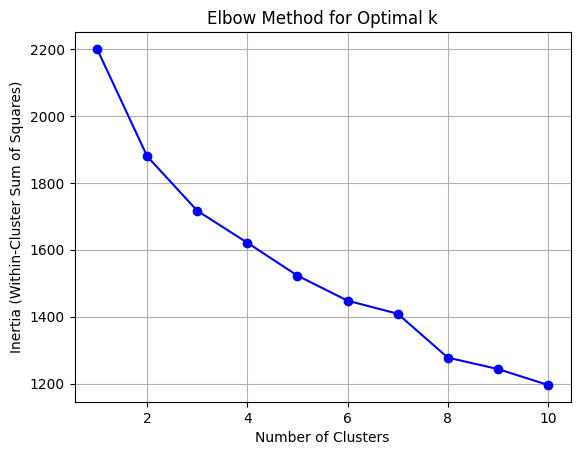

In [ ]:
inertia = []
K = range(1, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [ ]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


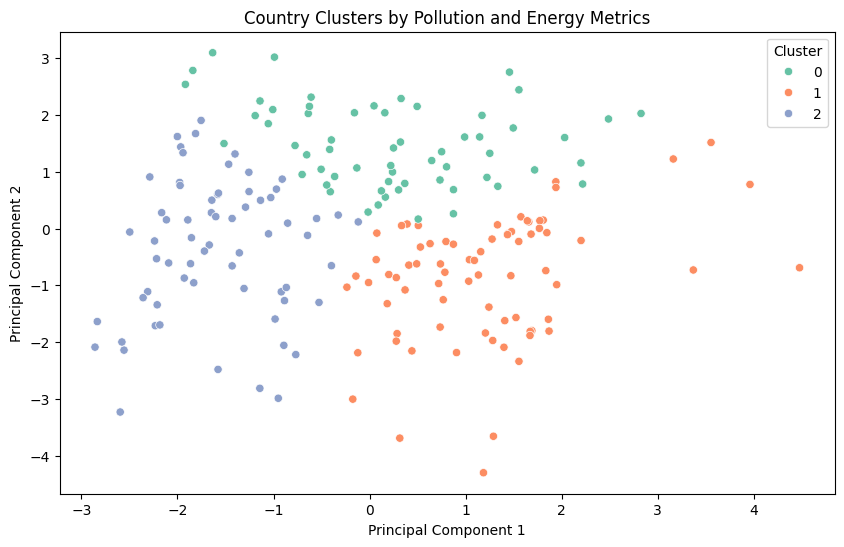

In [ ]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df['PCA1'] = components[:, 0]
df['PCA2'] = components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set2')
plt.title('Country Clusters by Pollution and Energy Metrics')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


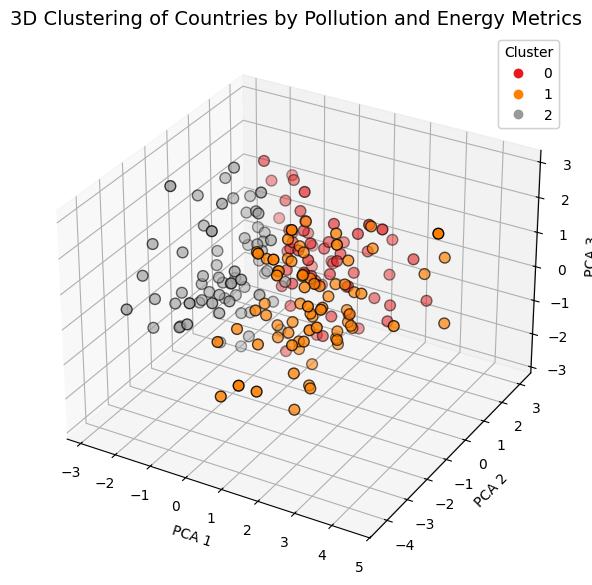

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

pca = PCA(n_components=3)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]
df['PCA3'] = pca_components[:, 2]


fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    df['PCA1'], df['PCA2'], df['PCA3'],
    c=df['Cluster'], cmap='Set1', s=60, edgecolors='k'
)

ax.set_title("3D Clustering of Countries by Pollution and Energy Metrics", fontsize=14)
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

legend = ax.legend(*scatter.legend_elements(), title="Cluster", loc="upper right")
ax.add_artist(legend)

plt.show()


In [ ]:
df[['Country', 'Cluster']].sort_values(by='Cluster')


,Country,Cluster
3,38,0
7,31,0
6,37,0
11,165,0
10,99,0
...,...,...
193,139,2
195,92,2
194,149,2
196,13,2


In [ ]:
cluster_summary = df.groupby('Cluster')[features].mean()
print(cluster_summary)


         Air_Pollution_Index  Water_Pollution_Index  Soil_Pollution_Index  \
Cluster                                                                     
0                   0.705091               0.621713              0.670965   
1                   0.449711               0.423921              0.439938   
2                   0.449498               0.471827              0.330688   

         Energy_Recovered (in GWh)  CO2_Emissions (in MT)  \
Cluster                                                     
0                       252.280333              26.416000   
1                       396.298919              25.291216   
2                       115.557576              23.016818   

         Renewable_Energy (%)  Plastic_Waste_Produced (in tons)  \
Cluster                                                           
0                   25.516000                      25748.163167   
1                   28.917568                      22400.040135   
2                   28.622424           

In [ ]:
# Select relevant features
features = [
    'Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index',
    'Energy_Recovered (in GWh)', 'CO2_Emissions (in MT)',
    'Renewable_Energy (%)', 'Plastic_Waste_Produced (in tons)',
    'Energy_Consumption_Per_Capita (in MWh)', 'Calculated_Energy_Per_Capita (MWh)',
    'Average_Pollution_Index'
]

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
# Create linkage matrix
linked = linkage(X_scaled, method='ward')  # 'ward' minimizes variance within clusters


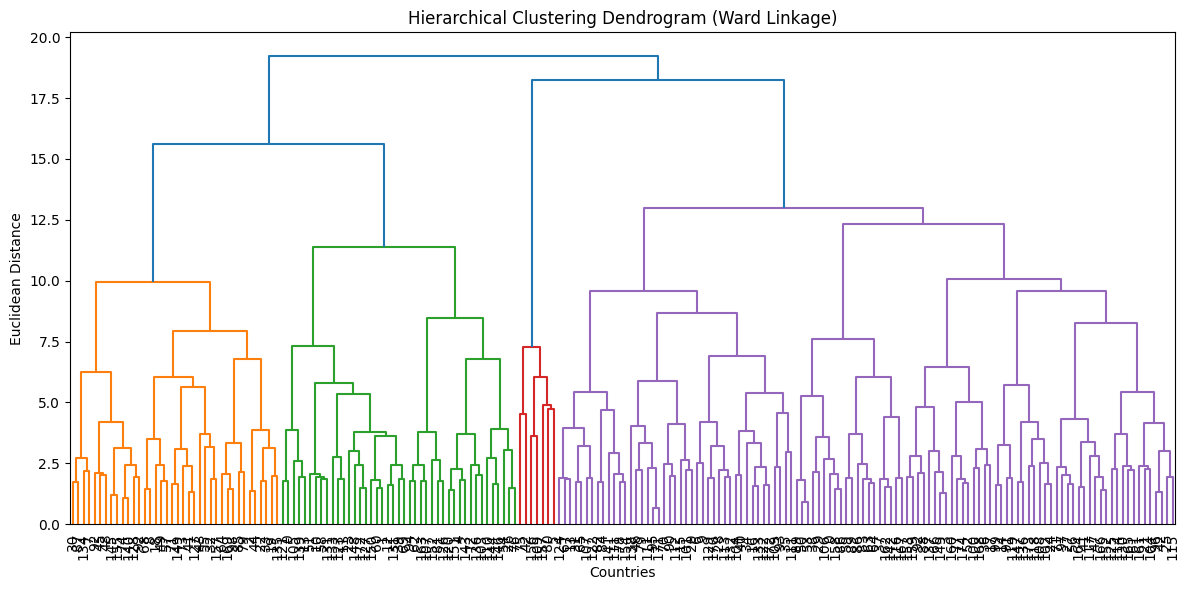

In [ ]:
plt.figure(figsize=(12, 6))
dendrogram(linked, labels=df['Country'].values, leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram (Ward Linkage)")
plt.xlabel("Countries")
plt.ylabel("Euclidean Distance")
plt.tight_layout()
plt.show()


In [ ]:
df['HCluster'] = fcluster(linked, t=3, criterion='maxclust')


In [ ]:
comparison = pd.crosstab(df['Cluster'], df['HCluster'])
print(comparison)


HCluster   1  2   3
Cluster            
0          6  0  54
1         37  6  31
2         38  1  27


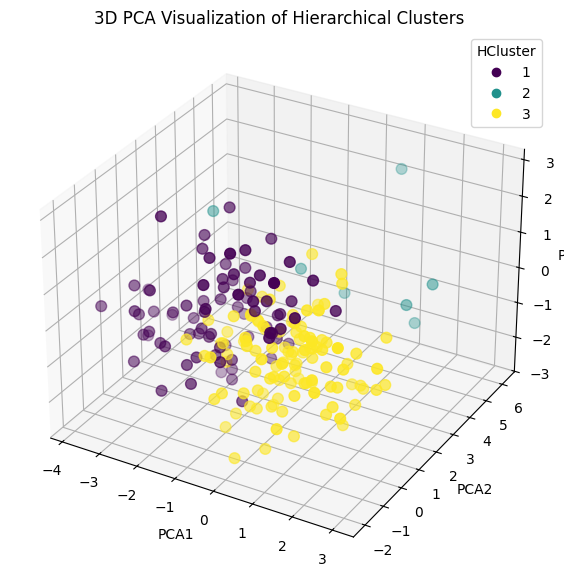

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_3d = pca.fit_transform(X_scaled)

df['PCA1'] = pca_3d[:, 0]
df['PCA2'] = pca_3d[:, 1]
df['PCA3'] = pca_3d[:, 2]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(df['PCA1'], df['PCA2'], df['PCA3'], c=df['HCluster'], cmap='viridis', s=60)
ax.set_title("3D PCA Visualization of Hierarchical Clusters")
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.legend(*sc.legend_elements(), title="HCluster")
plt.show()


In [ ]:
print("Average Delivery Time (K-Means):")
print(df.groupby('Cluster')['Pollution_Level'].mean())

print("\nAverage Delivery Time (Hierarchical):")
print(df.groupby('HCluster')['Pollution_Level'].mean())

Average Delivery Time (K-Means):
Cluster
0    1.900000
1    0.621622
2    0.636364
Name: Pollution_Level, dtype: float64

Average Delivery Time (Hierarchical):
HCluster
1    0.395062
2    1.142857
3    1.446429
Name: Pollution_Level, dtype: float64


## neural network


In [ ]:
from sklearn.model_selection import train_test_split
features = [
    'Air_Pollution_Index', 'CO2_Emissions (in MT)', 'Industrial_Waste (in tons)',
    'Plastic_Waste_Produced (in tons)', 'Water_Pollution_Index',
    'Soil_Pollution_Index', 'Renewable_Energy (%)',
    'Energy_Consumption_Per_Capita (in MWh)', 'Average_Pollution_Index'
]

target = 'Energy_Recovered (in GWh)'

X = df[features]
y = df[target]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))  # Output: Energy Recovered (GWh)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, verbose=0)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test).flatten()
loss, accuracy = model.evaluate(X_test, y_test)
# Metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")
print(f"Test Accuracy: {accuracy:.2f}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1007.4067 - mae: 25.3818
Mean Squared Error (MSE): 1059.75
Mean Absolute Error (MAE): 26.27
R² Score: 0.96
Test Accuracy: 26.27


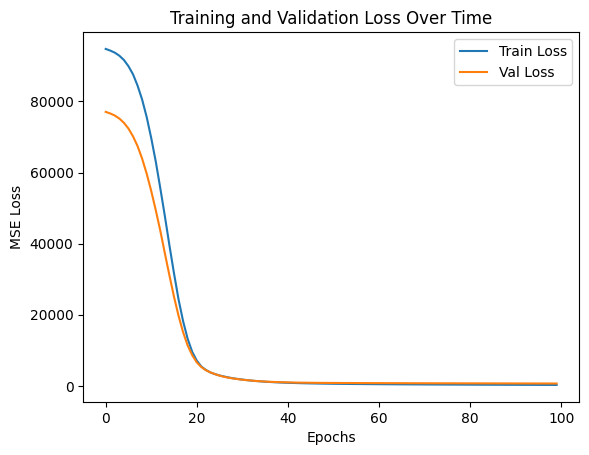

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.title("Training and Validation Loss Over Time")
plt.legend()
plt.show()


In [ ]:
def build_model(input_dim, layers=[64, 32], activation='relu', learning_rate=0.001):
    model = tf.keras.Sequential()
    model.add(Dense(layers[0], activation=activation, input_dim=input_dim))

    for neurons in layers[1:]:
        model.add(Dense(neurons, activation=activation))

    model.add(Dense(1))  # Output layer (regression)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model


In [ ]:
configs = [
    {'layers': [64, 32], 'activation': 'relu', 'learning_rate': 0.001},
    {'layers': [128, 64, 32], 'activation': 'relu', 'learning_rate': 0.0005},
    {'layers': [64, 64], 'activation': 'tanh', 'learning_rate': 0.001},
    {'layers': [32, 32], 'activation': 'relu', 'learning_rate': 0.01},
]


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[features]
y = df['Energy_Recovered (in GWh)']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

results = []

for config in configs:
    model = build_model(X_train.shape[1], config['layers'], config['activation'], config['learning_rate'])
    model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, verbose=0, validation_split=0.2)
    y_pred = model.predict(X_test_scaled).flatten()

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'layers': config['layers'],
        'activation': config['activation'],
        'lr': config['learning_rate'],
        'MSE': round(mse, 2),
        'MAE': round(mae, 2),
        'R2': round(r2, 3)
    })

pd.DataFrame(results)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


,layers,activation,lr,MSE,MAE,R2
0,"[64, 32]",relu,0.0010,28880.72,147.62,-0.194
1,"[128, 64, 32]",relu,0.0005,29334.94,149.48,-0.213
2,"[64, 64]",tanh,0.0010,40271.19,159.76,-0.665
3,"[32, 32]",relu,0.0100,41087.01,171.50,-0.699


In [ ]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Metrics
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.2f}, MAE: {mae_lr:.2f}, R²: {r2_lr:.3f}")


Linear Regression - MSE: 26060.80, MAE: 142.68, R²: -0.078


##  Reporting and Insights
In comparing K-Means, Hierarchical Clustering, and the neural network model for predicting energy recovery from pollution data, clear distinctions emerge in their strengths and use cases. K-Means and Hierarchical Clustering are unsupervised learning techniques that group countries based on similarities in pollution and energy metrics, offering valuable insights into environmental profiles and regional similarities. However, they lack predictive capabilities and do not directly estimate energy recovery. In contrast, the neural network—trained as a supervised regression model—demonstrates strong predictive performance, especially when relationships among variables are non-linear, achieving higher R² and lower error metrics compared to linear methods. While clustering is useful for exploratory analysis and policy grouping, the neural network excels in accurately forecasting energy recovery values. Therefore, for predictive tasks, the neural network provides superior accuracy, whereas clustering models are more suitable for uncovering underlying data structure and segmentation.


## Actionable Insights
Clustering offers powerful insights into patterns and trends in pollution and energy recovery by grouping countries with similar environmental and energy characteristics. For instance, countries grouped in high-pollution clusters often share traits such as elevated industrial waste, low renewable energy adoption, and high CO₂ emissions. Conversely, clusters with higher energy recovery tend to have more investment in clean technologies and better waste-to-energy infrastructure. By examining these clusters, policymakers can identify which environmental factors most strongly correlate with efficient energy recovery.

Using these insights, strategies can be recommended based on both clustering and neural network predictions. Countries in high-pollution, low-recovery clusters should prioritize reducing industrial and plastic waste, improving waste management systems, and investing in renewable energy. Neural network predictions can help simulate the potential impact of specific interventions (e.g., increasing renewable energy usage by 10%) on energy recovery. Countries in more efficient clusters can serve as models, offering scalable practices. Overall, combining clustering insights with predictive modeling provides a data-driven foundation for targeted environmental policy, technology investment, and regional collaboration.
